# DBSCAN - Обзор проверочных заданий

## Данные: Wholesale customers Data Set


Источник данных: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers


Описание атрибутов:

    1) FRESH: расходы за год на свежие продукты (непрерывная переменная);
    2) MILK: расходы за год на молочные продукты (непрерывная переменная);
    3) GROCERY: расходы за год на продовольственные товары / бакалея (непрерывная переменная);
    4) FROZEN: расходы за год на замороженные продукты (непрерывная переменная)
    5) DETERGENTS_PAPER: расходы за год на моющие средства и бумажные изделия (непрерывная переменная)
    6) DELICATESSEN: расходы за год на деликатесы (непрерывная переменная);
    7) CHANNEL: канал клиента - индустрия общественного питания Horeca (отели/рестораны/кафе) или розничный канал Retail (Категориальная переменная)
    8) REGION: регион клиента - Lisnon, Oporto или Other (Категориальная переменная)
 

Исходные статьи:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11



-----

## DBSCAN и примеры кластеризации данных





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('..\\DATA\\wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


## Исследование данных (EDA - Exploratory Data Analysis)

**Построим график scatterplot, отображающий зависимость между переменными MILK и GROCERY, выполняя раскраску цветами по колонке Channel.**

<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

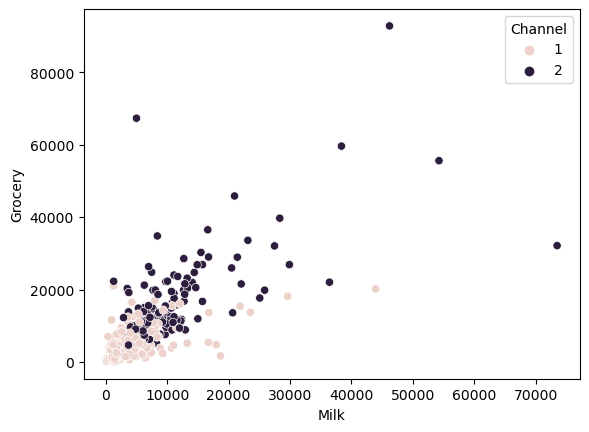

In [4]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

**С помощью seaborn постройте гистограмму для колонки MILK, выполняя раскраску цветами по колонке Channel.**

<AxesSubplot:xlabel='Milk', ylabel='Count'>

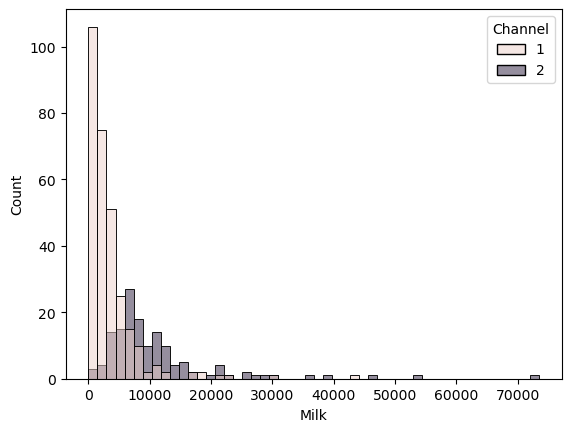

In [6]:
sns.histplot(data=df, x='Milk', hue='Channel' )

<AxesSubplot:xlabel='Milk', ylabel='Count'>

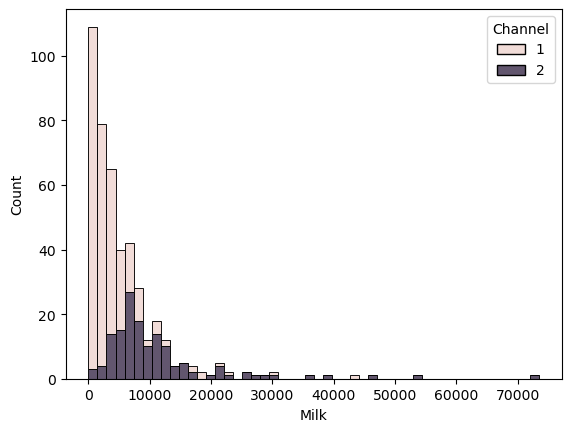

In [52]:
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack' )

**Постройте график clustermap для корреляций расходов по различным категориям.**

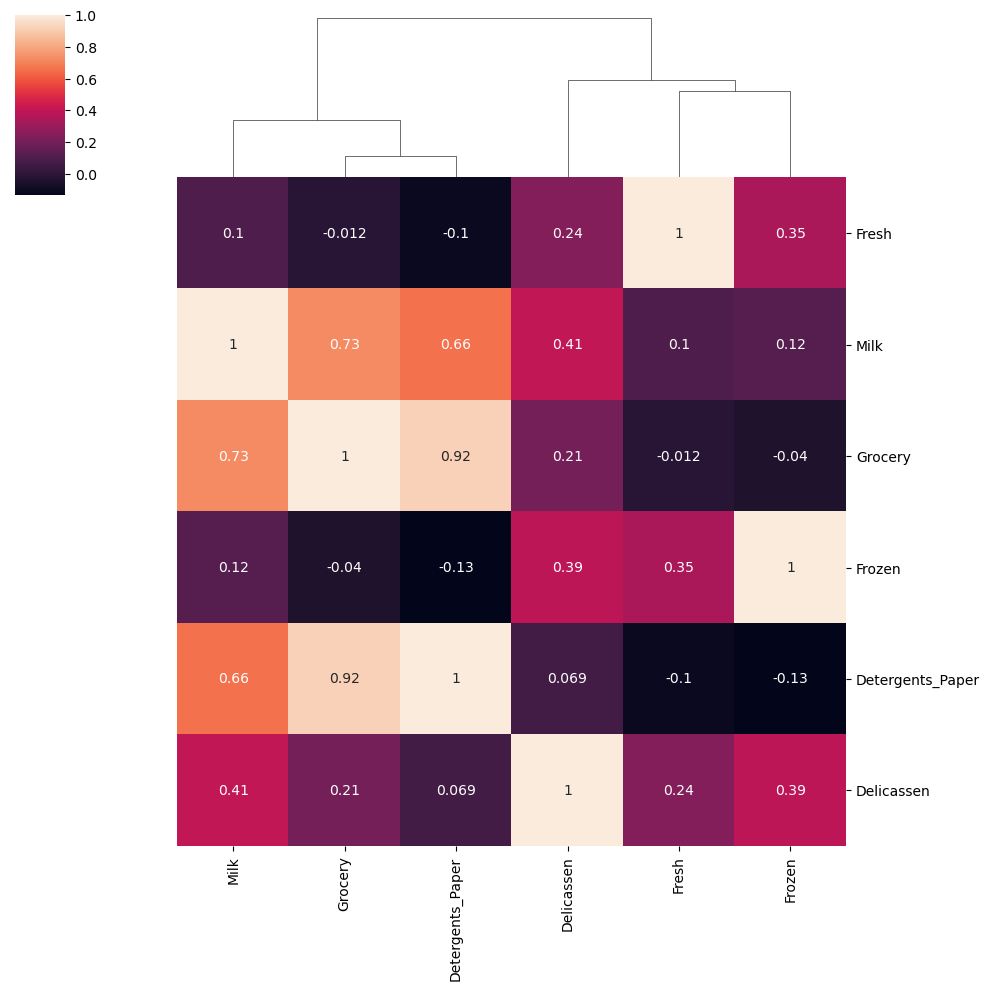

In [54]:
sns.clustermap(df[['Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']].corr(), annot=True, row_cluster=False)

**Построим график PairPlot для всех колонок датафрейма, раскрашивая разными цветами по колонке Region.**

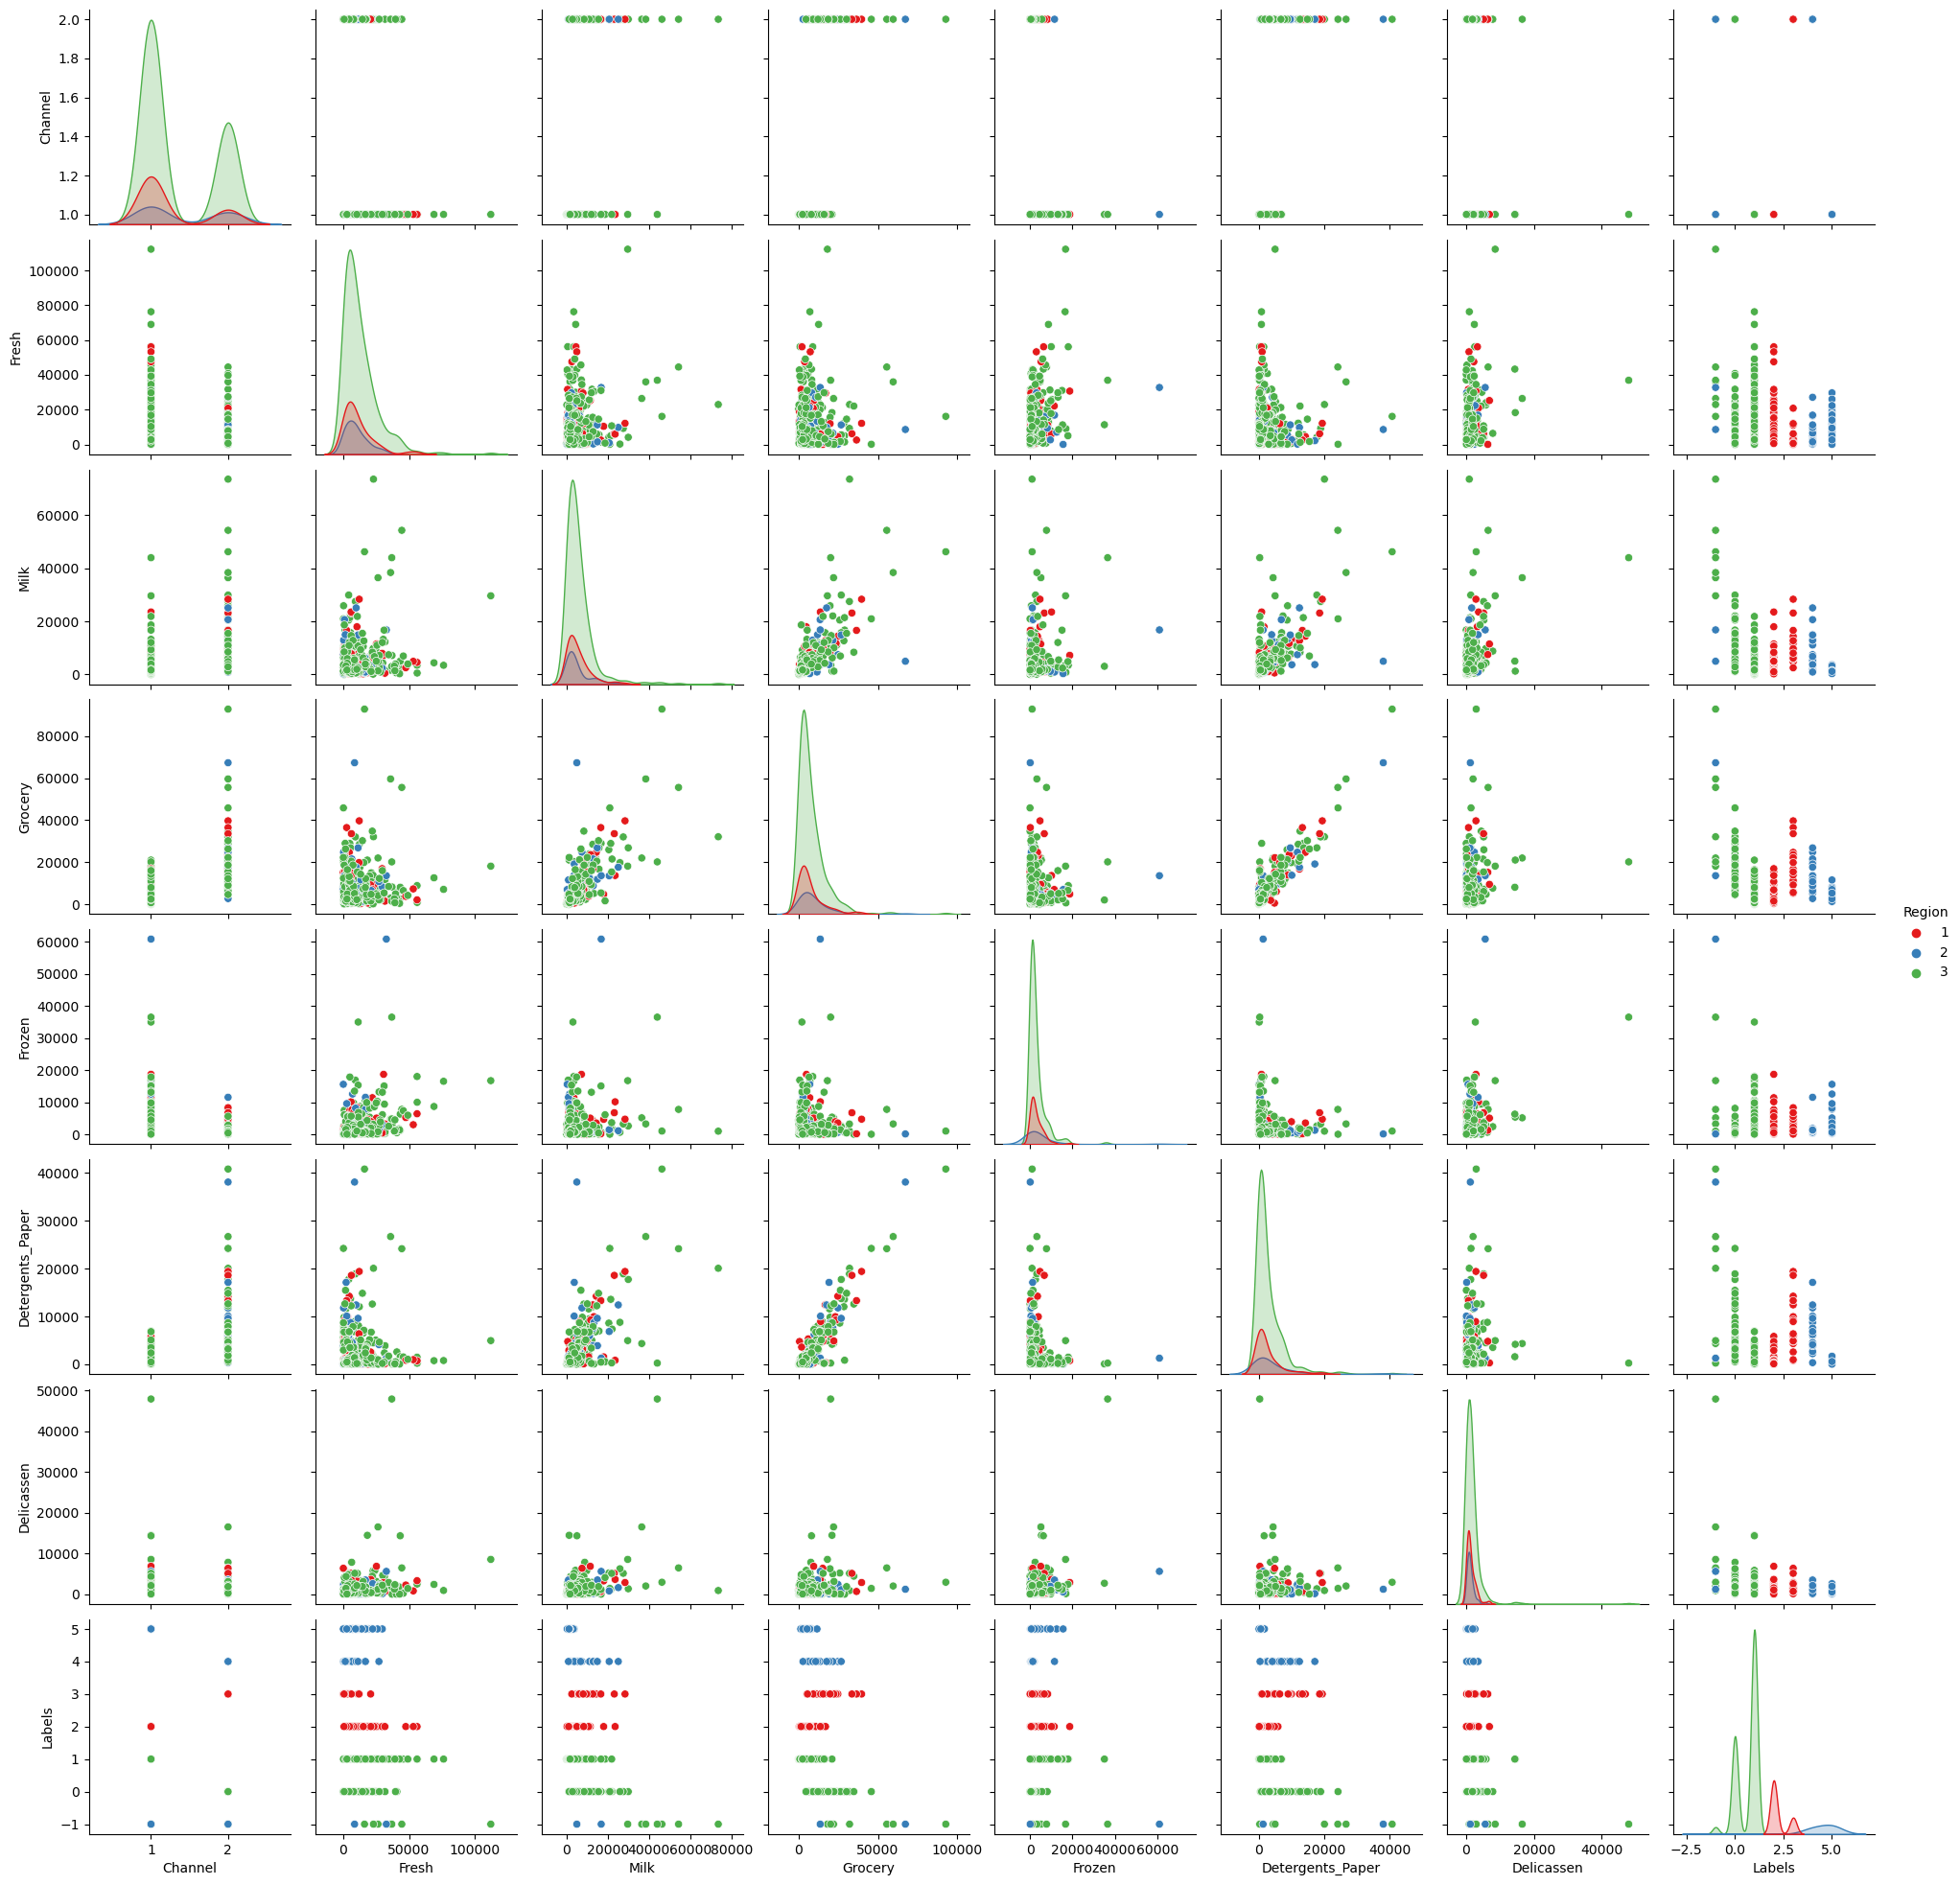

In [56]:
sns.pairplot(data=df,hue='Region', palette='Set1')

## DBSCAN

**Поскольку значения разных признаков имеют разные масштабы единиц измерения, выполним масштабирование данных с помощью StandardScaler.**

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [8]:
scaler = MinMaxScaler()

In [9]:
scaled_X = scaler.fit_transform(df)

In [10]:
X = df.copy()

In [11]:
X[X.columns] = scaled_X

In [12]:
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,1.0,1.0,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,1.0,1.0,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.0,1.0,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,1.0,1.0,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093
...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.264829,0.163338,0.172715,0.215469,0.004385,0.045912
436,0.0,1.0,0.349761,0.018736,0.008202,0.073713,0.002205,0.048874
437,1.0,1.0,0.129543,0.210136,0.325943,0.006771,0.363463,0.038882
438,0.0,1.0,0.091727,0.026224,0.024025,0.016649,0.004042,0.044264


**C помощью DBSCAN и цикла for создадим набор моделей для различных значений параметра эпсилон. В качестве параметра min_samples возьмем значение 2 умножить на количество признаков. Во время цикла сохраним процент точек-выбросов. В блокноте с решениями используем следующий диапазон значений эпсилон:**

    np.linspace(0.001,3,50)

In [16]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,3,50):
    model = DBSCAN(eps=eps, min_samples=2 * len(X.columns))
    model.fit(scaled_X)
    
    number_of_outliers.append(sum(model.labels_ == -1))
    
    percent = 100 * sum(model.labels_ == -1) / len(model.labels_)
    outlier_percent.append(percent)
    
    

**Задание: построим график lineplot для процента точек-выбросов в зависимости от значений эпсилон.**

Text(0.5, 0, 'Epsilon Value')

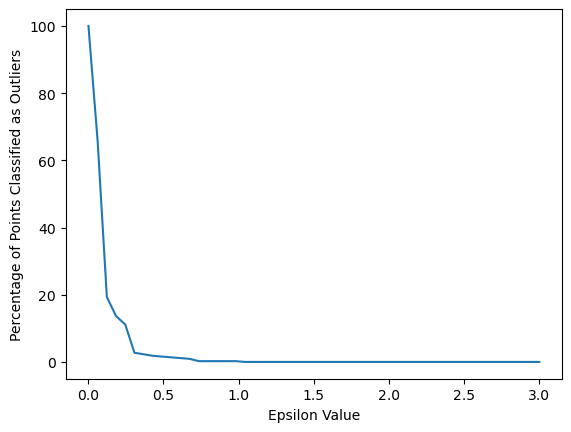

In [17]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

## DBSCAN для выбранного значения эпсилон

**На основе графика в предыдущем задании, создадим модель DBSCAN с выбранным начением эпсилон.**

In [18]:
model_2 = DBSCAN(eps=0.3)

In [19]:
model_2.fit(scaled_X)

DBSCAN(eps=0.3)

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

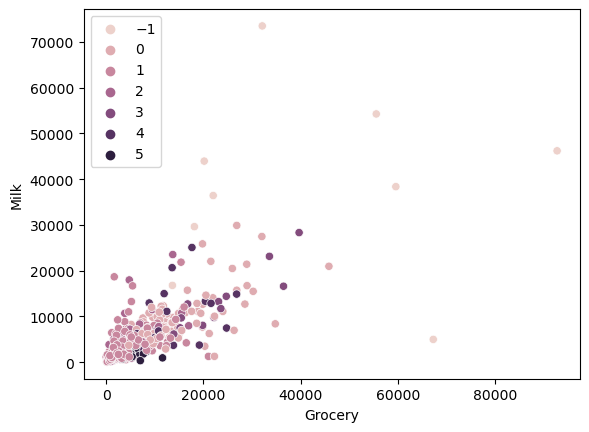

In [30]:
sns.scatterplot(data=df, x='Grocery', y='Milk', hue=model_2.labels_)

**Построим график scatterplot для колонок Milk и Detergents Paper, раскрашивая данные разными цветами по результатам работы модели DBSCAN.**

<AxesSubplot:xlabel='Milk', ylabel='Detergents_Paper'>

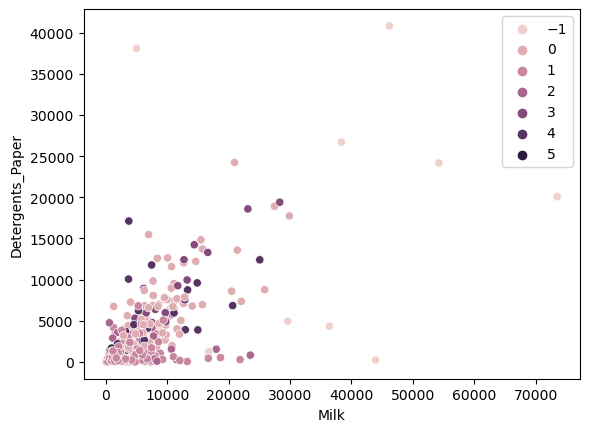

In [20]:
sns.scatterplot(data=df, x='Milk', y='Detergents_Paper', hue=model_2.labels_)

In [33]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


**Создадим новую колонку в исходном датафрейме, назовем эту колонку "Labels" и запишем в неё результаты работы модели DBSCAN - значения labels.**

In [22]:
df['Labels'] = model_2.labels_

In [37]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


**Вычислим средние значения расходов по различных категорий, причём отдельно для каждого из кластеров (включая кластер -1 для выбросов). Сравним расходы разных кластеров между собой (по отдельным категориям расходов).**

In [23]:
cats = df.drop(['Channel', 'Region'], axis=1)


In [24]:
cat_means = cats.groupby('Labels').mean()

In [25]:
cat_means 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,37344.777778,38231.888889,42369.333333,14720.222222,17851.888889,10241.000000
0,8864.850000,9042.600000,14130.680000,1406.830000,6083.140000,1629.000000
1,13297.947368,3168.306220,3740.588517,3436.971292,769.392344,1262.511962
2,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
3,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444
4,7218.944444,9424.722222,13494.555556,1618.888889,6760.722222,1240.333333
5,10870.296296,1767.962963,4053.629630,3703.407407,453.481481,939.111111


**Выполним нормализацию таблицы с данными, полученной в предыдущем задании, с помощью MinMaxScaler - чтобы значения менялись в диапазоне от 0 до 1. После этого построим тепловую карту heatmap для получившихся значений.**

In [27]:
from sklearn.preprocessing import MinMaxScaler


In [28]:
scaler = MinMaxScaler()
data = scaler.fit_transform(cat_means)
scaled_means = pd.DataFrame(data,cat_means.index,cat_means.columns)

<AxesSubplot:ylabel='Labels'>

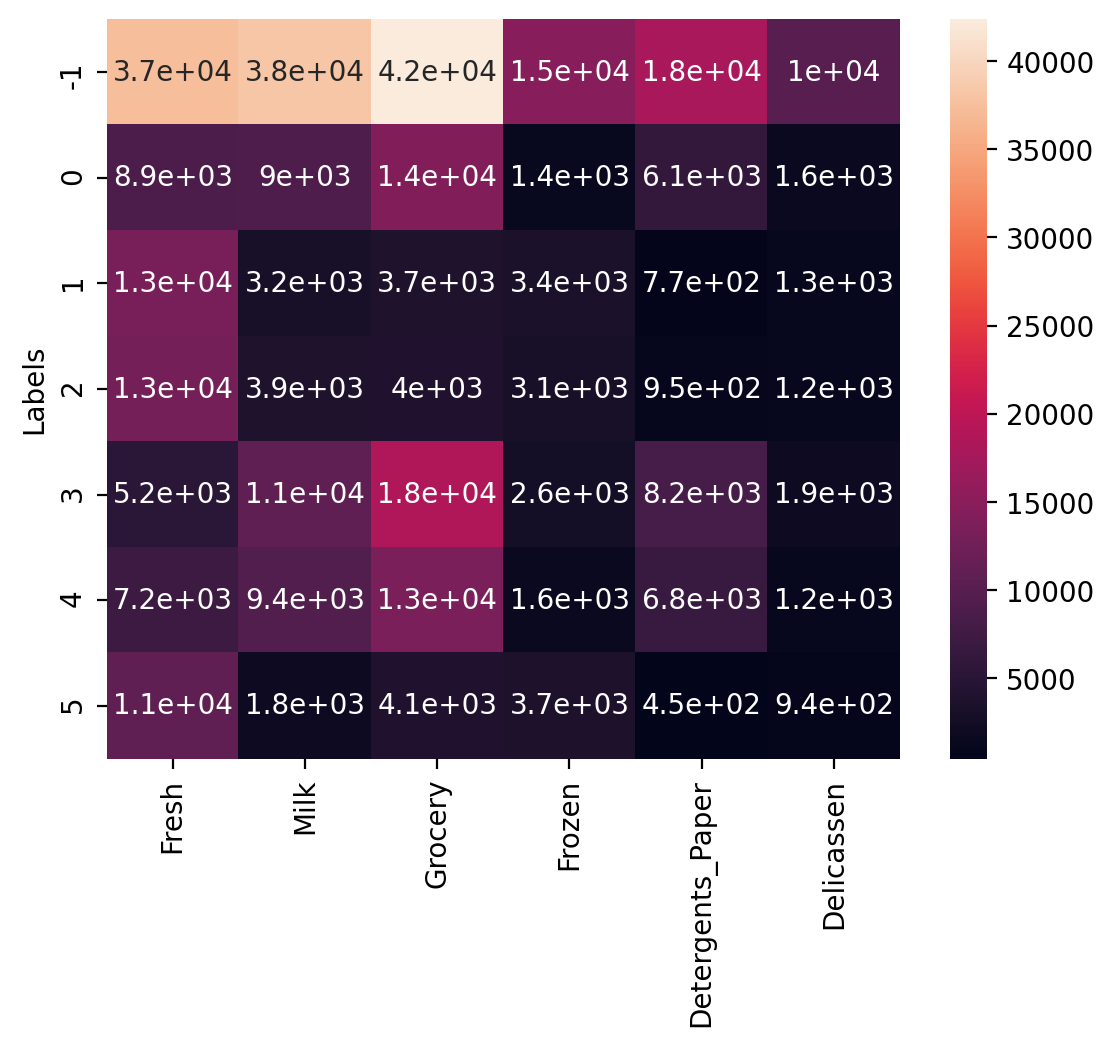

In [29]:
plt.figure(dpi=200)
sns.heatmap(cat_means, annot=True)

**Построим ещё одну тепловую карту - такую же, как и в предыдущем задании, но на этот раз предварительно удалите выбросы из рассмотрения.**

In [ ]:
# Напишите Ваш код в этой ячейке


<AxesSubplot:ylabel='Labels'>

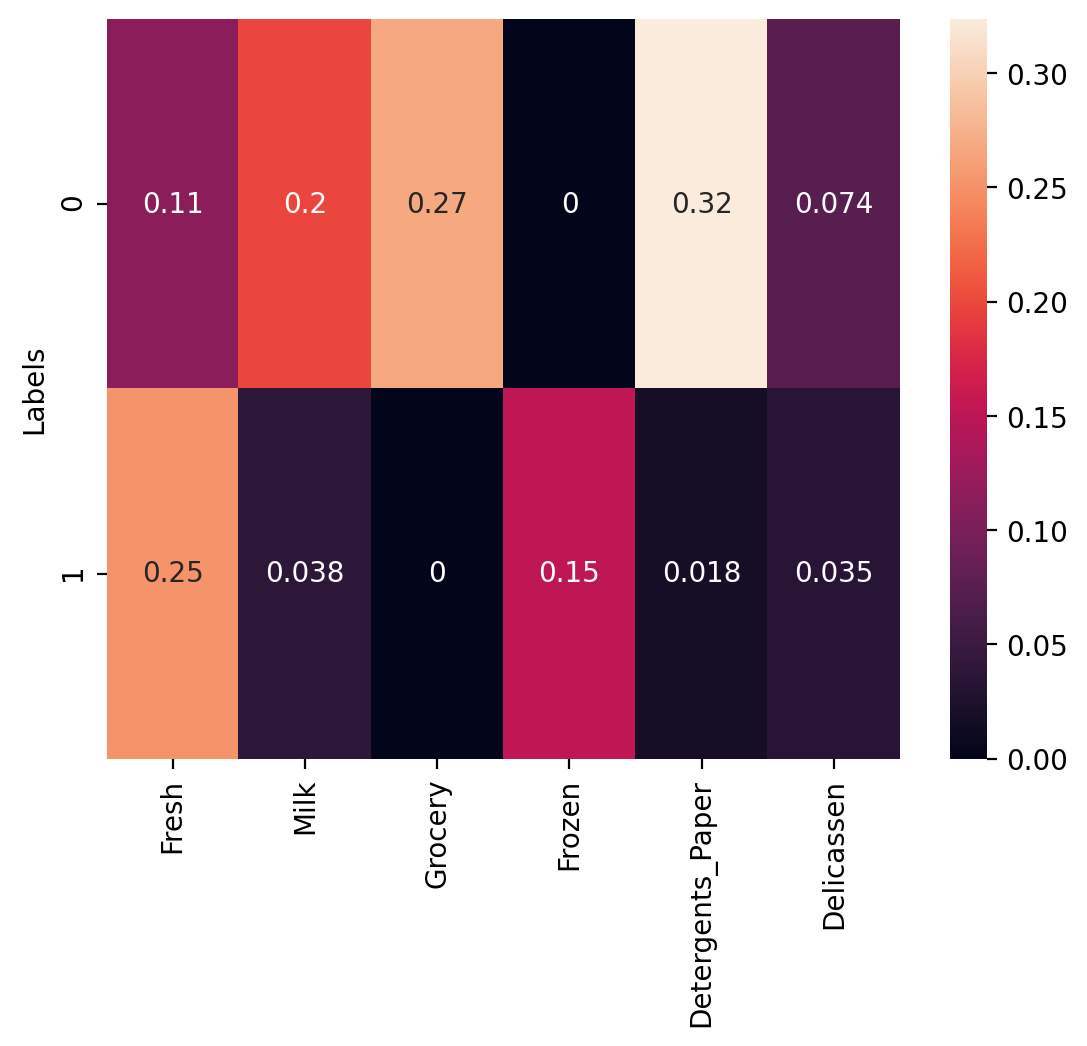

In [30]:
plt.figure(dpi=200)
sns.heatmap(scaled_means.loc[[0,1]],annot=True)